In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms,models
import os
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cuda')

In [4]:
num_classes = 4 # Change this to match your dataset

In [5]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Using cache found in C:\Users\VICTUS/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\VICTUS\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\VICTUS\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)
model = model.to(device)

In [60]:
print(num_features)
print(model)


512
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True

In [8]:
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [9]:
train_dataset = datasets.ImageFolder(r"D:\neurothon\Dataset_2\train", transform=train_transforms)
val_dataset = datasets.ImageFolder(r"D:\neurothon\Dataset_2\val", transform=val_transforms)


In [10]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

In [12]:
import torch

# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)
model = model.to(device)


Using device: cuda:0


In [13]:
import matplotlib.pyplot as plt

num_epochs = 50  # Adjust the number of epochs as needed
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    
    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
    
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch [1/50], Loss: 0.5098
Validation Accuracy: 0.6184
Epoch [2/50], Loss: 0.3471
Validation Accuracy: 0.6974
Epoch [3/50], Loss: 0.3203
Validation Accuracy: 0.6842
Epoch [4/50], Loss: 0.2881
Validation Accuracy: 0.7105
Epoch [5/50], Loss: 0.2800
Validation Accuracy: 0.6316
Epoch [6/50], Loss: 0.2842
Validation Accuracy: 0.6711
Epoch [7/50], Loss: 0.2551
Validation Accuracy: 0.6842
Epoch [8/50], Loss: 0.2516
Validation Accuracy: 0.7368
Epoch [9/50], Loss: 0.2463
Validation Accuracy: 0.6974
Epoch [10/50], Loss: 0.2387
Validation Accuracy: 0.7632
Epoch [11/50], Loss: 0.2418
Validation Accuracy: 0.7105
Epoch [12/50], Loss: 0.2313
Validation Accuracy: 0.6579
Epoch [13/50], Loss: 0.2316
Validation Accuracy: 0.6974
Epoch [14/50], Loss: 0.2247
Validation Accuracy: 0.6974
Epoch [15/50], Loss: 0.2182
Validation Accuracy: 0.7500
Epoch [16/50], Loss: 0.2180
Validation Accuracy: 0.6842
Epoch [17/50], Loss: 0.2166
Validation Accuracy: 0.6579
Epoch [18/50], Loss: 0.2168
Validation Accuracy: 0.6184
E

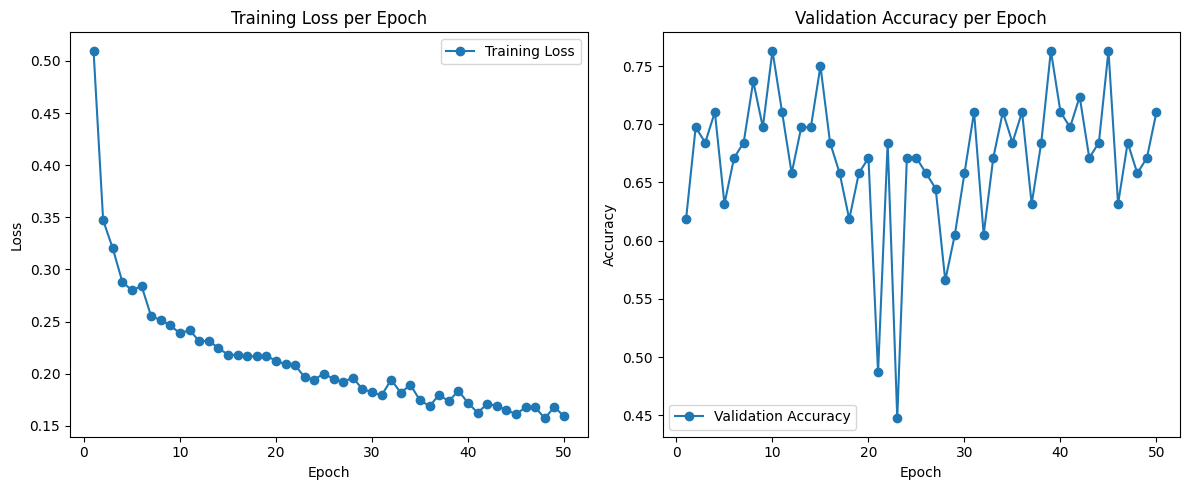

In [14]:
# Plotting the results after training
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), val_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
test_dataset =  datasets.ImageFolder(r"D:\neurothon\Dataset_2\test", transform=test_transforms)

# Make sure your test_loader is defined; for example:
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Set the model to evaluation mode
model.eval()

# Initialize counters for correct predictions and total samples
test_correct = 0
test_total = 0

# Disable gradient calculation for efficiency
with torch.no_grad():
    for images, labels in test_loader:
        # Move images and labels to the device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass: get predictions
        outputs = model(images)
        # Get the index of the class with the highest probability
        _, preds = torch.max(outputs, 1)
        
        # Update total count and count of correct predictions
        test_total += labels.size(0)
        test_correct += (preds == labels).sum().item()

# Calculate overall test accuracy
test_accuracy = test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7975


Predicted class: DME


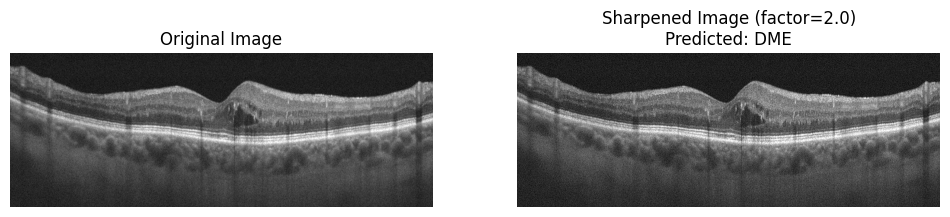

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

# 1. Load the image using PIL and convert it to RGB.
image_path = r"D:\neurothon\test.jpg"
original_image = Image.open(image_path).convert("RGB")

# 2. Adjust the sharpness (set sharpness_factor > 1 to sharpen, < 1 to blur, 1 leaves it unchanged)
sharpness_factor = 2.0  # You can modify this factor as needed
sharpened_image = TF.adjust_sharpness(original_image, sharpness_factor)

# 3. Define your test transforms (exclude any sharpness adjustment here since we already applied it)
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Apply the test transforms to the sharpened image
input_tensor = test_transforms(sharpened_image)

# Add a batch dimension and move to the correct device
input_batch = input_tensor.unsqueeze(0).to(device)

# 4. Set the model to evaluation mode and perform prediction
model.eval()
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class index
_, predicted_idx = torch.max(output, 1)
predicted_idx = predicted_idx.item()

# Map the predicted index to a class name (assuming train_dataset.classes exists)
predicted_class = train_dataset.classes[predicted_idx]

print("Predicted class:", predicted_class)

# 5. Display the original and sharpened images side by side for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title(f"Sharpened Image (factor={sharpness_factor})\nPredicted: {predicted_class}")
plt.axis("off")

plt.show()


In [26]:
import torch

# Save the model to a specific directory
torch.save(model.state_dict(), r"D:\neurothon\saved_model\model.pth")

# Load the model from the correct path
model.load_state_dict(torch.load(r"D:\neurothon\saved_model\model.pth"))

# Set model to evaluation mode
model.eval()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_24028\2643937886.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r"D:\neurothon\saved_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  